In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Thư viện

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
import os
dir_image = '/gdrive/MyDrive/CVData/TrainDataCatDog'

In [4]:
cat7_img_gray = cv2.imread((os.path.join(dir_image, 'cat7.jpg')), 0)
cat5_img_gray = cv2.imread((os.path.join(dir_image, 'cat5.jpg')), 0)
tranggiay_img_gray = cv2.imread((os.path.join(dir_image, 'tranggiay.jpg')), 0)
tranggiay1_img_gray = cv2.imread((os.path.join(dir_image, 'tranggiay1.jpg')), 0)
bien_img_gray = cv2.imread((os.path.join(dir_image, 'a.jpg')), 0)

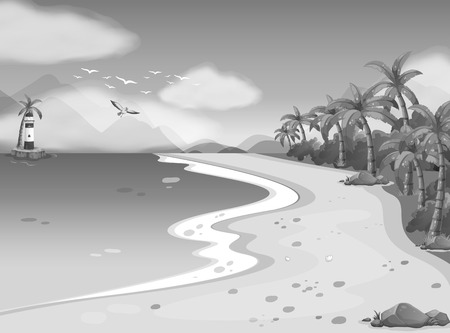

In [ ]:
cv2_imshow(bien_img_gray)

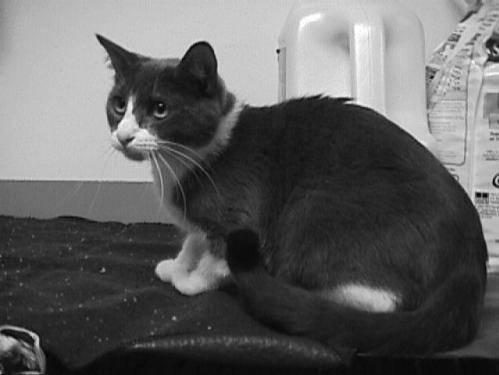

In [ ]:
cv2_imshow(cat7_img_gray)

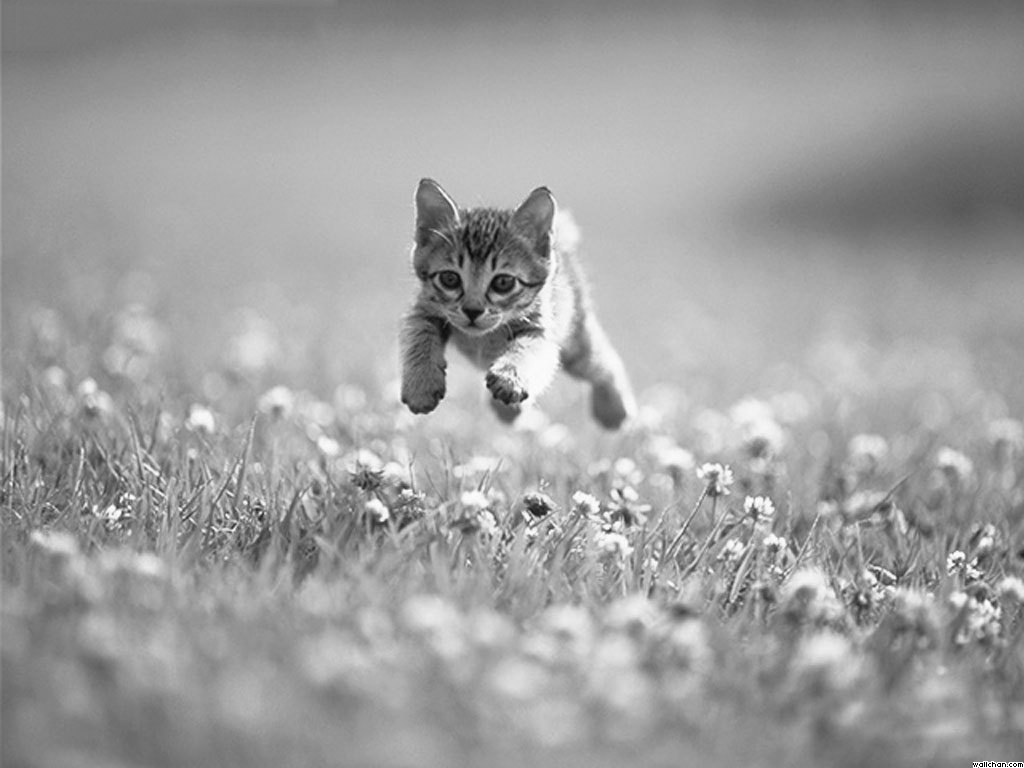

In [ ]:
cv2_imshow(cat5_img_gray)

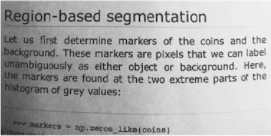

In [ ]:
cv2_imshow(tranggiay_img_gray)

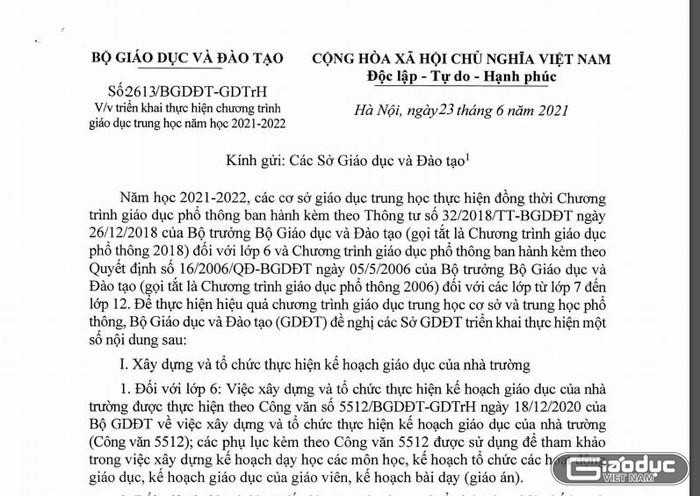

In [ ]:
cv2_imshow(tranggiay1_img_gray)

In [ ]:
def drawHis(x):
  hist = cv2.calcHist([x], [0], None, [256], [0,256])
  plt.plot(hist)
  plt.xlim([0,256])
  plt.legend(('histogram'), loc = 'upper left')
  plt.show()

In [ ]:
def Segmentation(f, T):
  g = f.copy()

  for i in range(f.shape[0]):
    for j in range(f.shape[1]):
      if int(f[i, j]) > int(T):
        g[i, j] = 255
      else:
        g[i, j] = 0
  return g

In [ ]:
def AdaptiveSeg(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      cv2_imshow(x)
      drawHis(x)
      t = int(input())
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = Segmentation(x, t)
  return g

# Global Threshold

## Bien


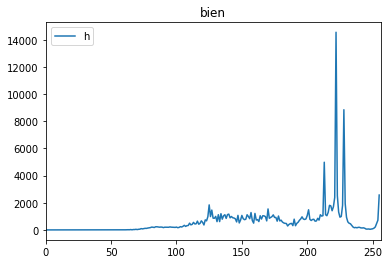

In [ ]:
plt.title('bien')
drawHis(bien_img_gray)

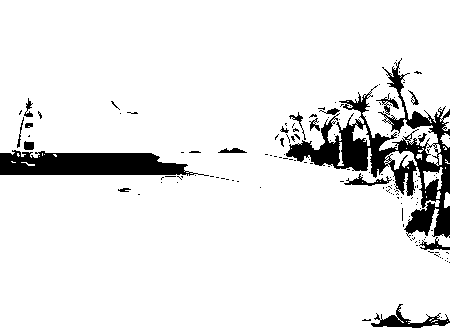

In [ ]:
bien_seg = Segmentation(bien_img_gray, 120)
cv2_imshow(bien_seg)

## Cat7

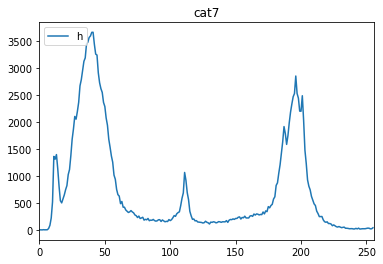

In [ ]:
plt.title('cat7')
drawHis(cat7_img_gray)

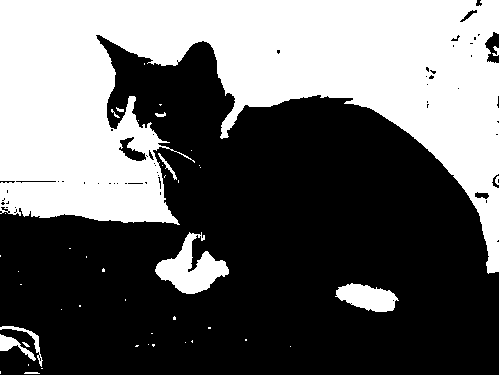

In [ ]:
cat7_seg = Segmentation(cat7_img_gray, 100)
cv2_imshow(cat7_seg)

## Cat5

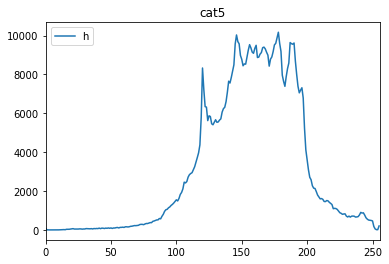

In [ ]:
plt.title('cat5')
drawHis(cat5_img_gray)

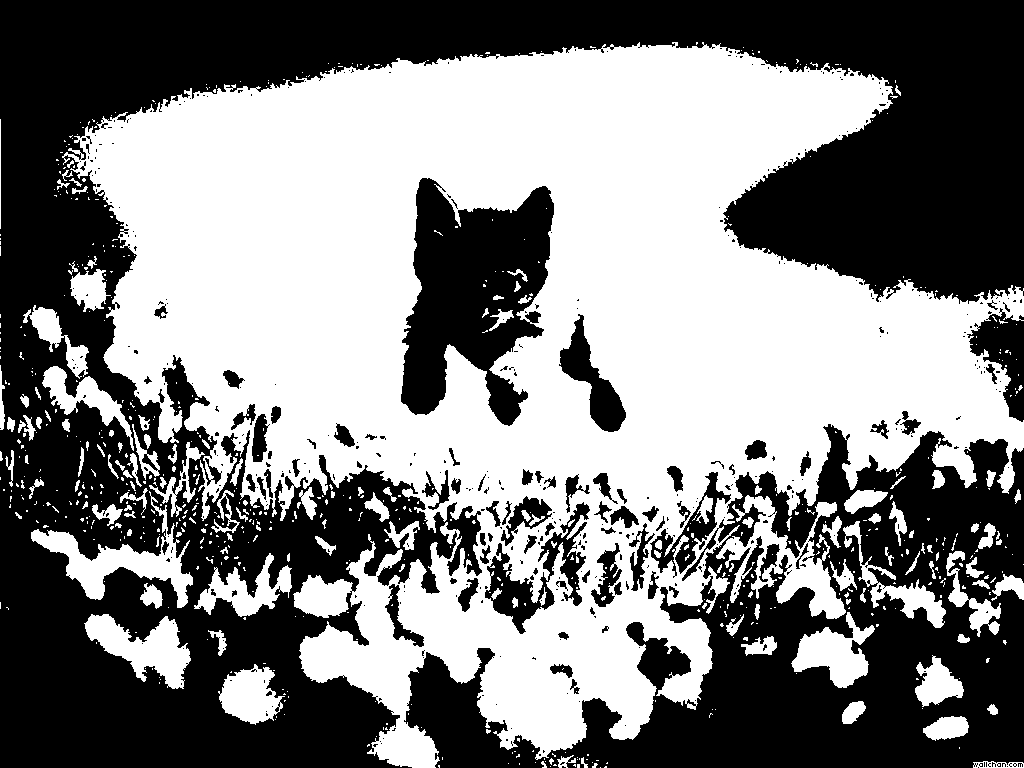

In [ ]:
cat5_seg = Segmentation(cat5_img_gray, 160)
cv2_imshow(cat5_seg)

## tranggiay

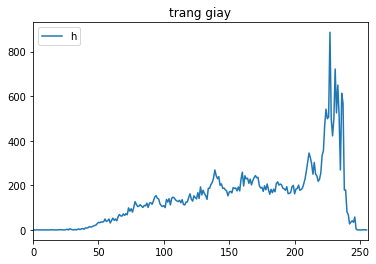

In [ ]:
plt.title('trang giay')
drawHis(tranggiay_img_gray)

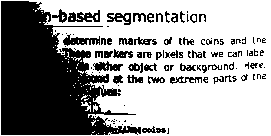

In [ ]:
tranggiay_seg = Segmentation(tranggiay_img_gray, 158)
cv2_imshow(tranggiay_seg)

## tranggiay1

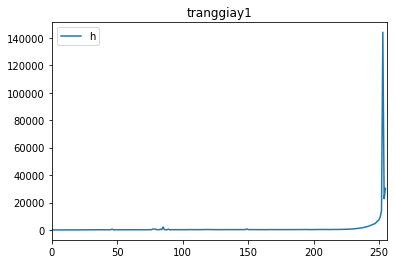

In [ ]:
plt.title('tranggiay1')
drawHis(tranggiay1_img_gray)

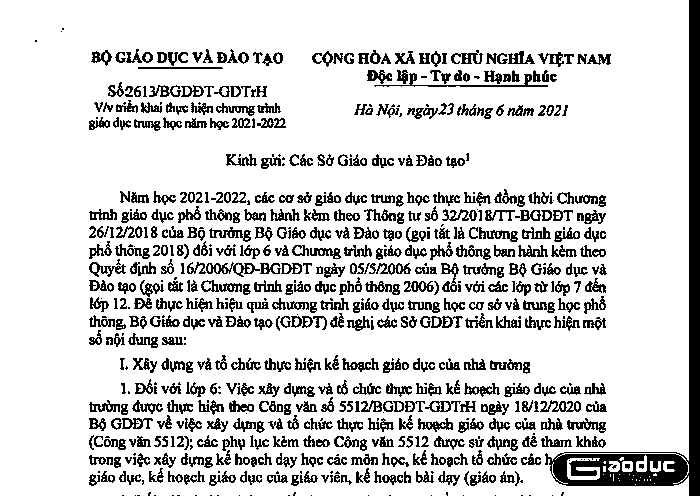

In [ ]:
tranggiay1_seg = Segmentation(tranggiay1_img_gray, 210)
cv2_imshow(tranggiay1_seg)

# Otsu

## Bien

In [ ]:
ret_bien,th_bien = cv2.threshold(bien_img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

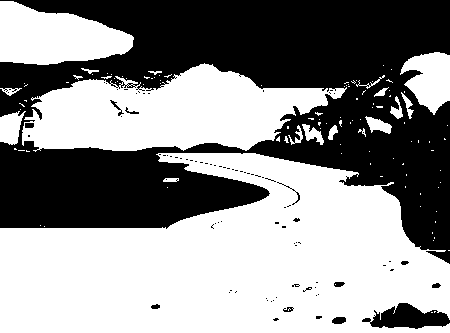

In [ ]:
cv2_imshow(th_bien)

## Cat5

In [ ]:
ret_cat5,th_cat5 = cv2.threshold(cat5_img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

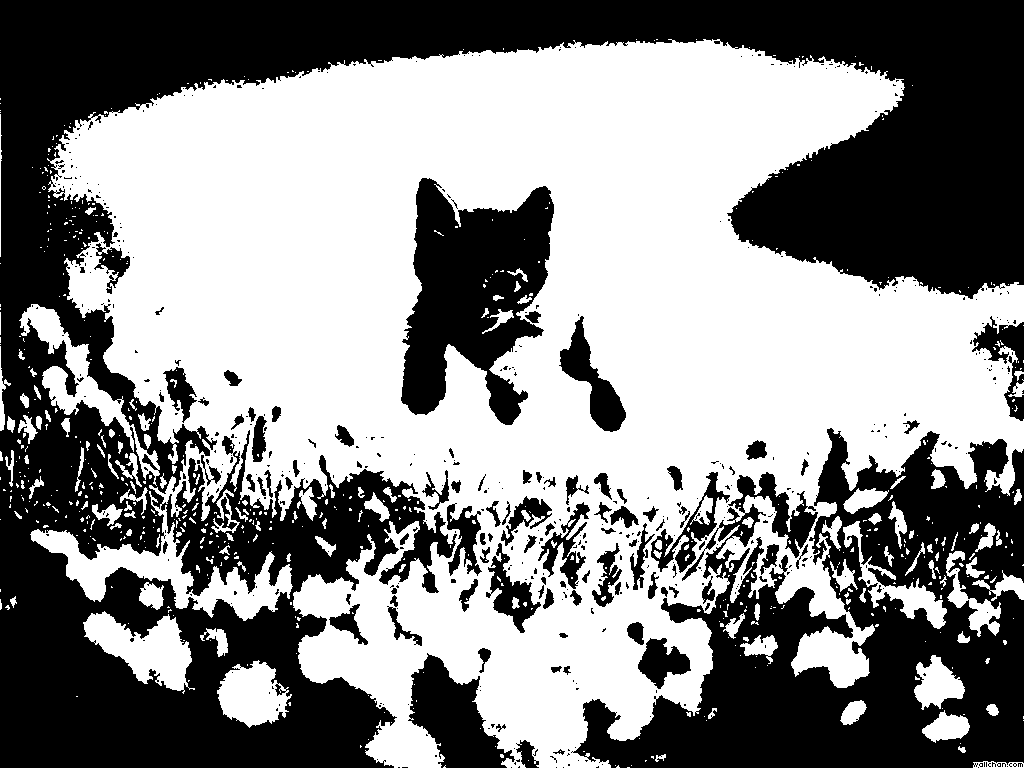

In [ ]:
cv2_imshow(th_cat5)

# Adaptive Threshold

## cat5

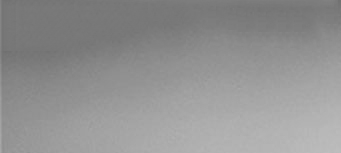

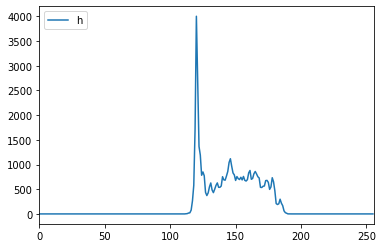

50


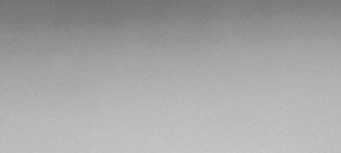

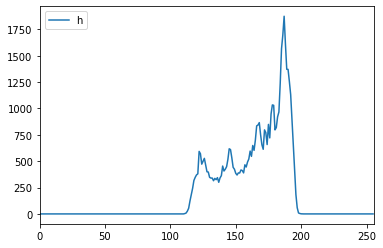

50


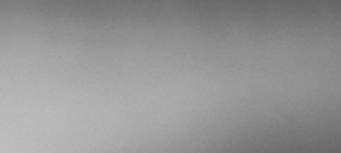

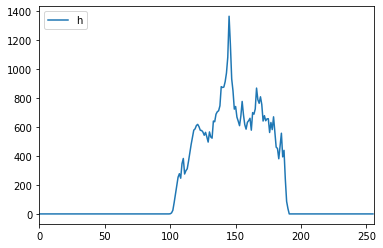

50


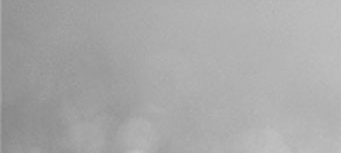

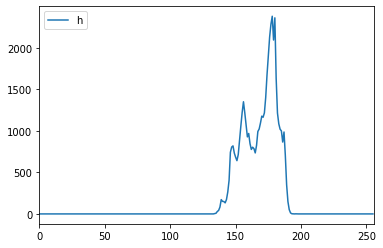

50


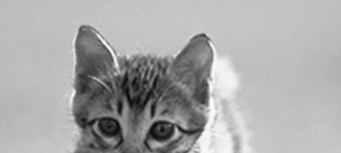

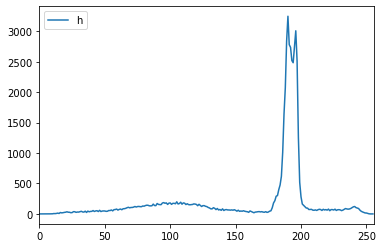

100


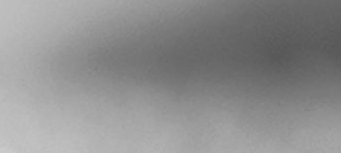

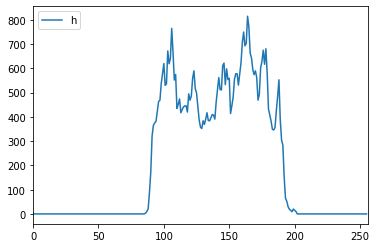

50


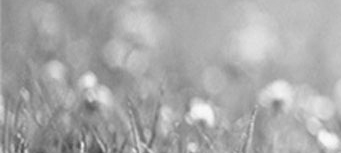

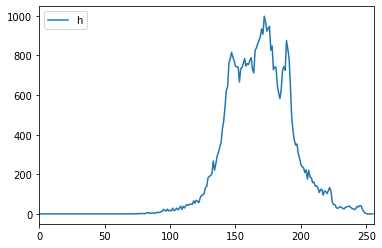

50


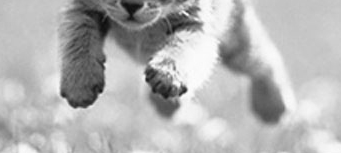

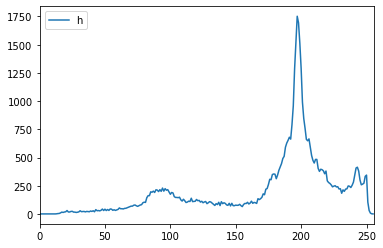

95


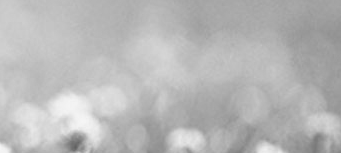

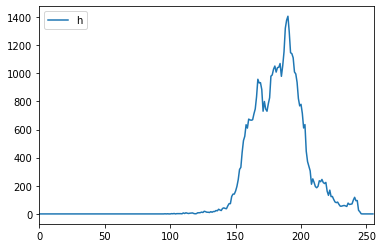

50


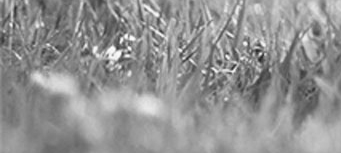

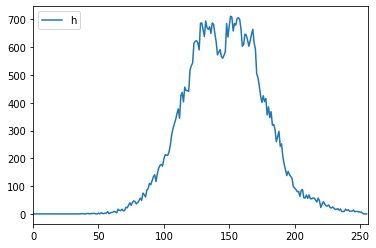

20


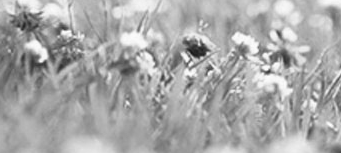

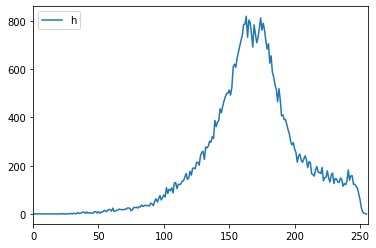

20


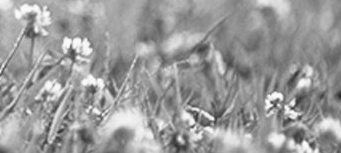

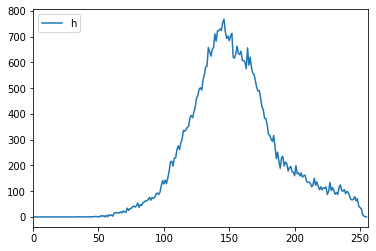

20


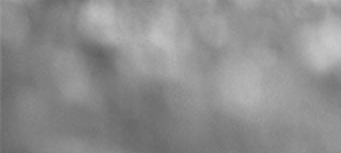

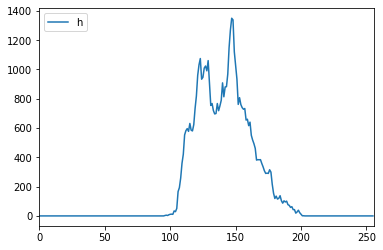

20


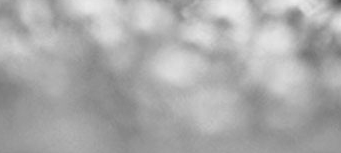

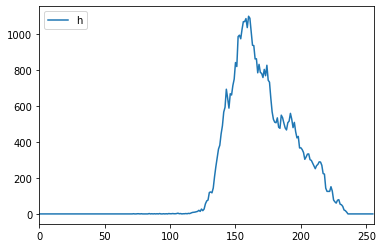

20


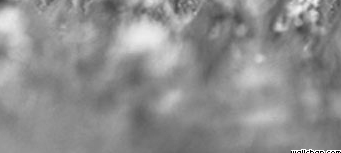

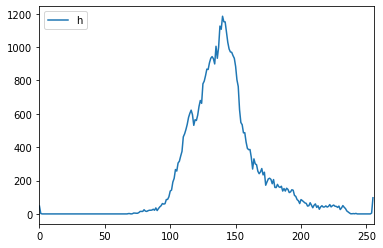

20


In [ ]:
cat5_adap = AdaptiveSeg(cat5_img_gray, 5, 3)

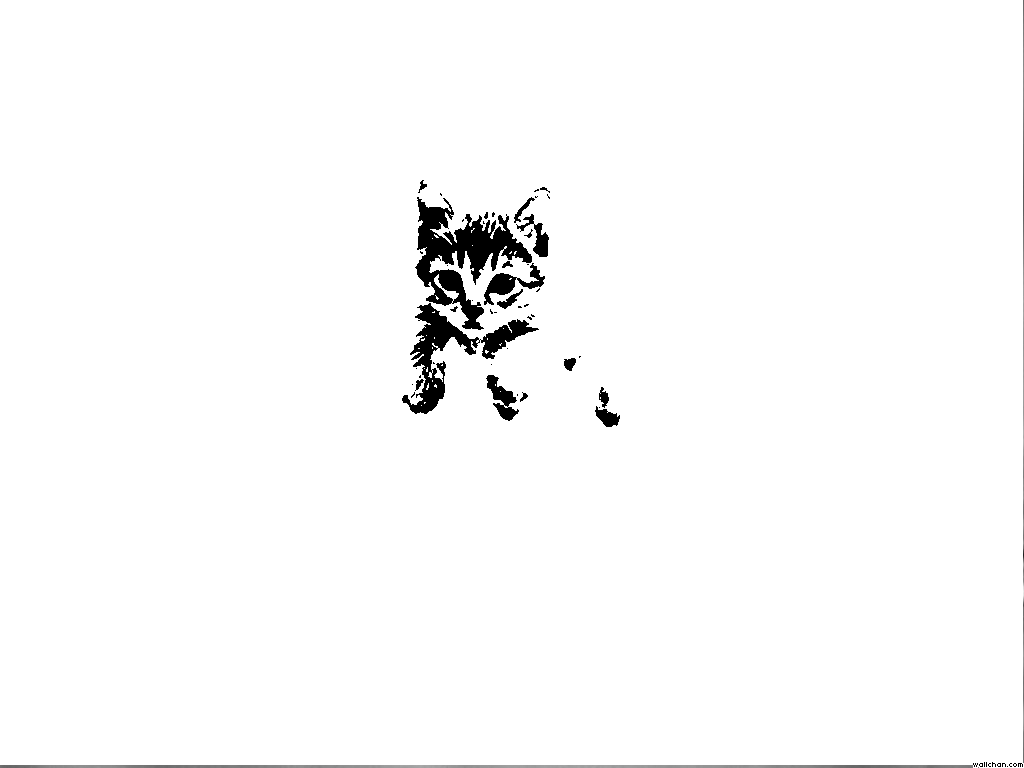

In [ ]:
cv2_imshow(cat5_adap)

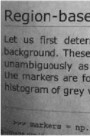

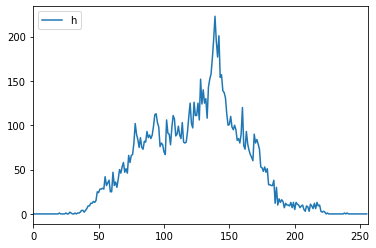

140


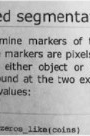

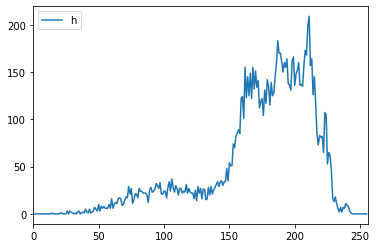

160


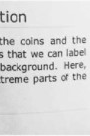

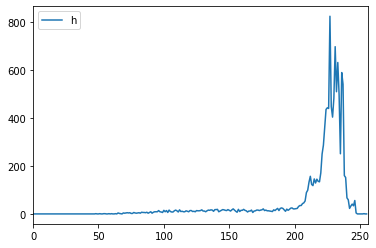

230


In [ ]:
tranggiay_adap = AdaptiveSeg(tranggiay_img_gray, 1, 3)

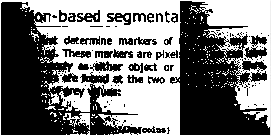

In [ ]:
cv2_imshow(tranggiay_adap)

# Adaptive Mean Threshold

## Cat7

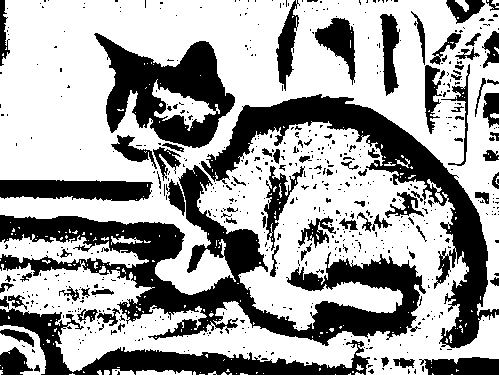

In [ ]:
cat7_mean = cv2.adaptiveThreshold(cat7_img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 5)
cv2_imshow(cat7_mean)

## cat5

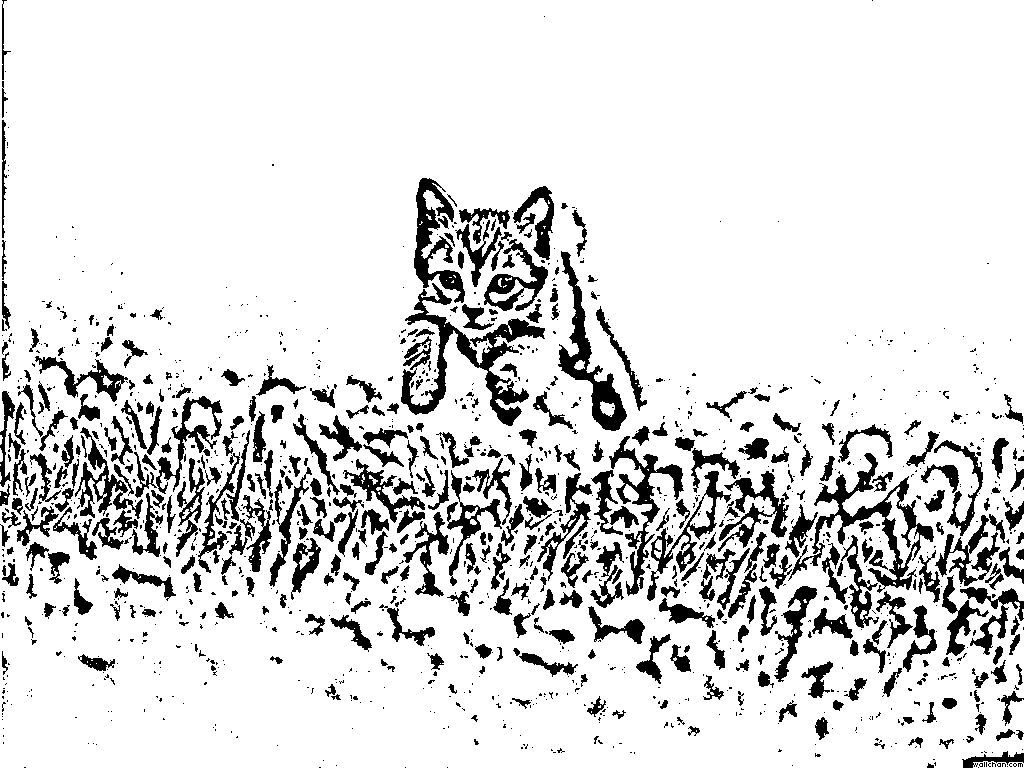

In [ ]:
cat5_mean = cv2.adaptiveThreshold(cat5_img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 7)
cv2_imshow(cat5_mean)

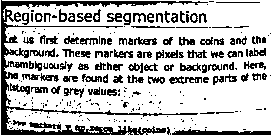

In [ ]:
tranggiay_mean = cv2.adaptiveThreshold(tranggiay_img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)
cv2_imshow(tranggiay_mean)

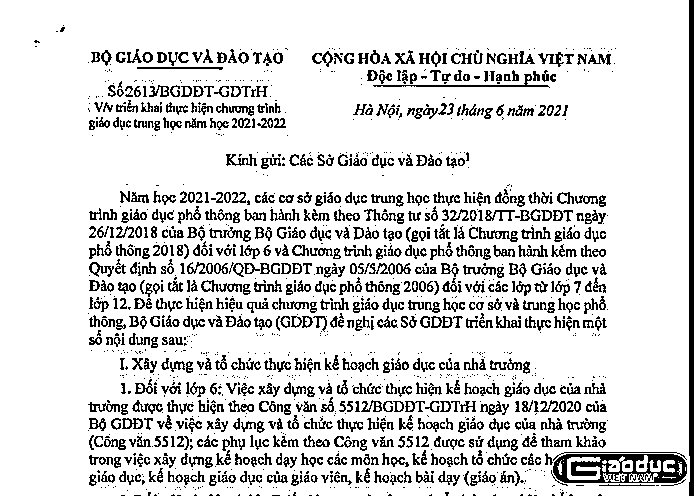

In [ ]:
tranggiay1_mean = cv2.adaptiveThreshold(tranggiay1_img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
cv2_imshow(tranggiay1_mean)